# Ministry of Production 
https://www.datosabiertos.gob.pe/group/ministerio-de-la-producci%C3%B3n

## Directory of Large Companies in the Manufacturing sector [Ministry of Production - PRODUCE] 2021
https://www.datosabiertos.gob.pe/dataset/directorio-de-grandes-empresas-del-sector-manufactura-ministerio-de-la-producci%C3%B3n-produce

### Dataset Description :
Directory of large companies in the Manufacturing sector of Peru, Contains the companies that make the greatest contribution to the Manufacturing GDP. 
All the companies on this list are accredited by the National Superintendence of Customs and Tax Administration (SUNAT), that is, they have a RUC number. 

#### This dataset is characterized by: 
RUC, Ubigeo, CIIU

## Objective:
To provide a comprehensive directory of large companies operating in the Manufacturing sector in Lima. These companies are identified based on their significant contributions to the Manufacturing GDP and are accredited by the National Superintendence of Customs and Tax Administration (SUNAT). The dataset aims to offer insights into the key players in the manufacturing industry, including their details such as RUC (Registro Único de Contribuyentes), company names, industry classifications (CIIU), geographical locations, and publication information.

## 1. Data Preprocessing:
- Loaded the dataset and selected the required columns.
- Renamed columns for better readability.
- Converted columns to the appropriate datatype format.
- Checked for null and duplicate values (none found).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('Directory of Large Companies in the Manufacturing sector 2021.csv', encoding='latin1')

In [3]:
data.head()

,ruc,razon_social,descripcion_ciiu3,ciiu3,departamento,provincia,distrito,ubigeo,sector,PERIODO,FECHA_PUBLICACION
0,20516271052,EXPORTACIONES E INVERSIONES DEL PACIFICO S.A.C.,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,CHORRILLOS,150108,MANUFACTURA,2021,20230626
1,20167217789,FERNANDEZ S.A.C.,ELAB. Y CONS DE PESCADO.,1512,PIURA,PIURA,CATACAOS,200105,MANUFACTURA,2021,20230626
2,20330862450,COMPANIA PESQUERA DEL PACIFICO CENTRO SA,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,SANTIAGO DE SURCO,150140,MANUFACTURA,2021,20230626
3,20505561318,INVERSIONES HOLDING PERU SOCIEDAD ANONIMA CERRADA,ELAB. Y CONS DE PESCADO.,1512,PIURA,PAITA,PAITA,200501,MANUFACTURA,2021,20230626
4,20553053073,CMAR SOCIEDAD ANONIMA CERRADA - CMAR S.A.C.,ELAB. Y CONS DE PESCADO.,1512,TUMBES,TUMBES,TUMBES,240101,MANUFACTURA,2021,20230626


In [4]:
data.shape

(1552, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ruc                1552 non-null   int64 
 1   razon_social       1552 non-null   object
 2   descripcion_ciiu3  1552 non-null   object
 3   ciiu3              1552 non-null   int64 
 4   departamento       1552 non-null   object
 5   provincia          1552 non-null   object
 6   distrito           1552 non-null   object
 7   ubigeo             1552 non-null   int64 
 8   sector             1552 non-null   object
 9   PERIODO            1552 non-null   int64 
 10  FECHA_PUBLICACION  1552 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 133.5+ KB


In [6]:
data.columns

Index(['ruc', 'razon_social', 'descripcion_ciiu3', 'ciiu3', 'departamento',
       'provincia', 'distrito', 'ubigeo', 'sector', 'PERIODO',
       'FECHA_PUBLICACION'],
      dtype='object')

In [7]:
data.isnull().sum()

ruc                  0
razon_social         0
descripcion_ciiu3    0
ciiu3                0
departamento         0
provincia            0
distrito             0
ubigeo               0
sector               0
PERIODO              0
FECHA_PUBLICACION    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
# Mapping Spanish column names to English
column_mapping = {
    'ruc' : 'RUC',
    'razon_social' : 'Company_Name',
    'descripcion_ciiu3' : 'DESCRIPTION_CIIU' ,
    'ciiu3': 'CIIU',
    'departamento': 'Department', 
    'provincia': 'Province',
    'distrito': 'District',
    'ubigeo': 'UBIGEO',
    'sector': 'Sector',
    'PERIODO': 'PERIOD',
    'FECHA_PUBLICACION': 'PUBLICATION_DATE'
}

# Rename columns
data.rename(columns=column_mapping, inplace=True)

# Display the updated DataFrame
data.head()

,RUC,Company_Name,DESCRIPTION_CIIU,CIIU,Department,Province,District,UBIGEO,Sector,PERIOD,PUBLICATION_DATE
0,20516271052,EXPORTACIONES E INVERSIONES DEL PACIFICO S.A.C.,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,CHORRILLOS,150108,MANUFACTURA,2021,20230626
1,20167217789,FERNANDEZ S.A.C.,ELAB. Y CONS DE PESCADO.,1512,PIURA,PIURA,CATACAOS,200105,MANUFACTURA,2021,20230626
2,20330862450,COMPANIA PESQUERA DEL PACIFICO CENTRO SA,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,SANTIAGO DE SURCO,150140,MANUFACTURA,2021,20230626
3,20505561318,INVERSIONES HOLDING PERU SOCIEDAD ANONIMA CERRADA,ELAB. Y CONS DE PESCADO.,1512,PIURA,PAITA,PAITA,200501,MANUFACTURA,2021,20230626
4,20553053073,CMAR SOCIEDAD ANONIMA CERRADA - CMAR S.A.C.,ELAB. Y CONS DE PESCADO.,1512,TUMBES,TUMBES,TUMBES,240101,MANUFACTURA,2021,20230626


**Note:
 CIIU stands for [CLASIFICACION INDUSTRIAL INTERNACIONAL UNIFORME] (International Standard Industrial Classification)**

In [10]:
# Retrieve only the rows that belongs to LIMA
df = data[(data['Department'] == 'LIMA') & (data['Province'] == 'LIMA')]
df

,RUC,Company_Name,DESCRIPTION_CIIU,CIIU,Department,Province,District,UBIGEO,Sector,PERIOD,PUBLICATION_DATE
0,20516271052,EXPORTACIONES E INVERSIONES DEL PACIFICO S.A.C.,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,CHORRILLOS,150108,MANUFACTURA,2021,20230626
2,20330862450,COMPANIA PESQUERA DEL PACIFICO CENTRO SA,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,SANTIAGO DE SURCO,150140,MANUFACTURA,2021,20230626
5,20544125681,ANDECORP S.A.C.,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,SANTA ANITA,150137,MANUFACTURA,2021,20230626
7,20565525531,PESCADOS Y CEFALOPODOS DEL PERU SOCIEDAD ANONI...,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133,MANUFACTURA,2021,20230626
8,20159473148,PESQUERA DIAMANTE S.A.,ELAB. Y CONS DE PESCADO.,1512,LIMA,LIMA,SAN ISIDRO,150131,MANUFACTURA,2021,20230626
...,...,...,...,...,...,...,...,...,...,...,...
1546,20509801038,GACETA COMERCIAL SOCIEDAD ANONIMA-GACETA COMER...,ED. DE PERIODICOS Y REVISTAS.,2212,LIMA,LIMA,MIRAFLORES,150122,MANUFACTURA,2021,20230626
1547,20268135571,GACETA JURIDICA S.A.,ED. DE PERIODICOS Y REVISTAS.,2212,LIMA,LIMA,MIRAFLORES,150122,MANUFACTURA,2021,20230626
1548,20111492868,LITHO LASER S.A.,OTROS TRABAJOS DE EDICION.,2219,LIMA,LIMA,CHORRILLOS,150108,MANUFACTURA,2021,20230626
1549,20517228177,COMERCIALIZACION,FAB. OTROS PROD. DE METAL NCP.,2899,LIMA,LIMA,CHORRILLOS,150108,MANUFACTURA,2021,20230626


In [11]:
df.dtypes

RUC                  int64
Company_Name        object
DESCRIPTION_CIIU    object
CIIU                 int64
Department          object
Province            object
District            object
UBIGEO               int64
Sector              object
PERIOD               int64
PUBLICATION_DATE     int64
dtype: object

In [12]:
df['PUBLICATION_DATE'] = pd.to_datetime(df['PUBLICATION_DATE'], format='%Y%m%d')
df['PERIOD'] = pd.to_datetime(df['PERIOD'], format='%Y').dt.to_period('Y')

C:\Users\l\AppData\Local\Temp\ipykernel_28584\1377632576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PUBLICATION_DATE'] = pd.to_datetime(df['PUBLICATION_DATE'], format='%Y%m%d')
C:\Users\l\AppData\Local\Temp\ipykernel_28584\1377632576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PERIOD'] = pd.to_datetime(df['PERIOD'], format='%Y').dt.to_period('Y')


In [13]:
df.dtypes

RUC                          int64
Company_Name                object
DESCRIPTION_CIIU            object
CIIU                         int64
Department                  object
Province                    object
District                    object
UBIGEO                       int64
Sector                      object
PERIOD               period[A-DEC]
PUBLICATION_DATE    datetime64[ns]
dtype: object

In [14]:
df.drop(columns=['Department','Province'], inplace=True)

C:\Users\l\AppData\Local\Temp\ipykernel_28584\997518605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Department','Province'], inplace=True)


In [15]:
df.District.nunique()

38

In [16]:
df.CIIU.nunique()

93

In [17]:
df.DESCRIPTION_CIIU.nunique()

93

In [18]:
df.Company_Name.nunique()

1161

In [19]:
df.to_csv("Large Companies 2021 (Manufacturing Sector).csv")

## 2. Exploratory data Analysis

## Industry Contribution Assessment:

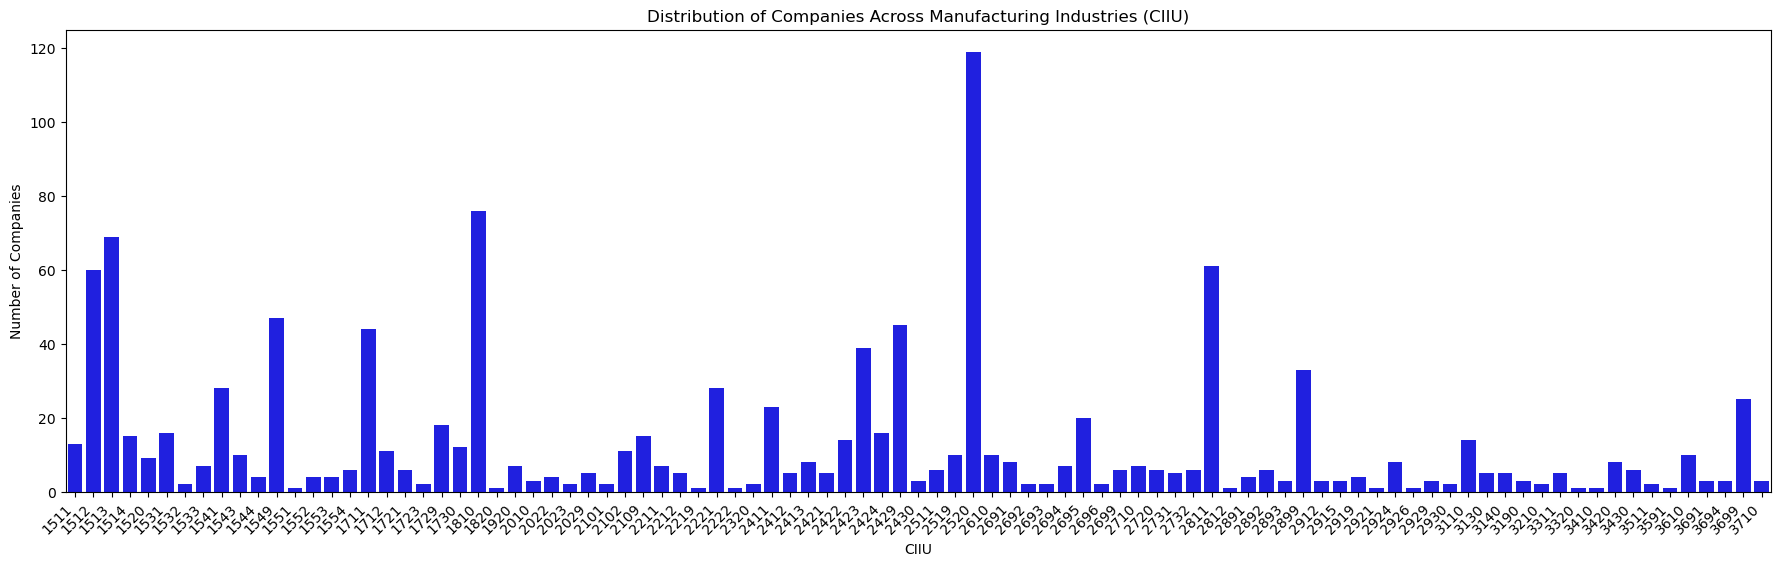

In [23]:
# 1. Analyze the distribution of companies across different manufacturing industries (CIIU)
industry_distribution = df['CIIU'].value_counts()

# Plotting the distribution
plt.figure(figsize=(22, 6))
sns.barplot(x=industry_distribution.index, y=industry_distribution.values, color='blue')
plt.title('Distribution of Companies Across Manufacturing Industries (CIIU)')
plt.xlabel('CIIU')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph shows that the most number of companies with CIIU code in the Lima manufacturing sector is 2520 (Manufacture Of Weapons And Ammunition) with around 120 companies.
Second largest CIIU codes include 1810, 1513 and 2811, 1512.

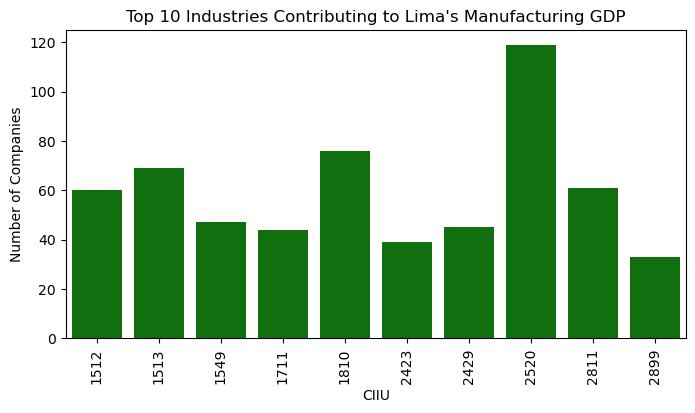

In [77]:
# 2. Identify key industries contributing the most to Lima's manufacturing GDP
top_industries = df.groupby('CIIU')['Company_Name'].count().sort_values(ascending=False).head(10)

# Plotting the top contributing industries
plt.figure(figsize=(8, 4))
sns.barplot(x=top_industries.index, y=top_industries.values, color='green')
plt.title('Top 10 Industries Contributing to Lima\'s Manufacturing GDP')
plt.xlabel('CIIU')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()

In [83]:
# 3.Identify industries within manufacturing that make the most significant contribution to Lima's GDP.
top_industries = df.groupby('DESCRIPTION_CIIU')['RUC'].count().sort_values(ascending=False).head(10)

print("\nTop Industries contributing to Lima's GDP:")
print(top_industries)


Top Industries contributing to Lima's GDP:
DESCRIPTION_CIIU
FAB. DE PRODUCTOS DE PLASTICOS.       119
FAB. DE PRENDAS DE VESTIR.             76
ELAB. FRUTAS LEG. Y HORTALIZAS.        69
FAB. PROD. METAL. USO ESTRUCTURAL.     61
ELAB. Y CONS DE PESCADO.               60
ELAB DE OTROS PROD. ALIMENTICIOS.      47
FAB. DE OTROS PROD. QUIMICOS NEOP.     45
PREP Y TEJ DE FIBRAS TEXTILES.         44
FAB. DE PROD. FARMACEUTICOS.           39
FAB. OTROS PROD. DE METAL NCP.         33
Name: RUC, dtype: int64


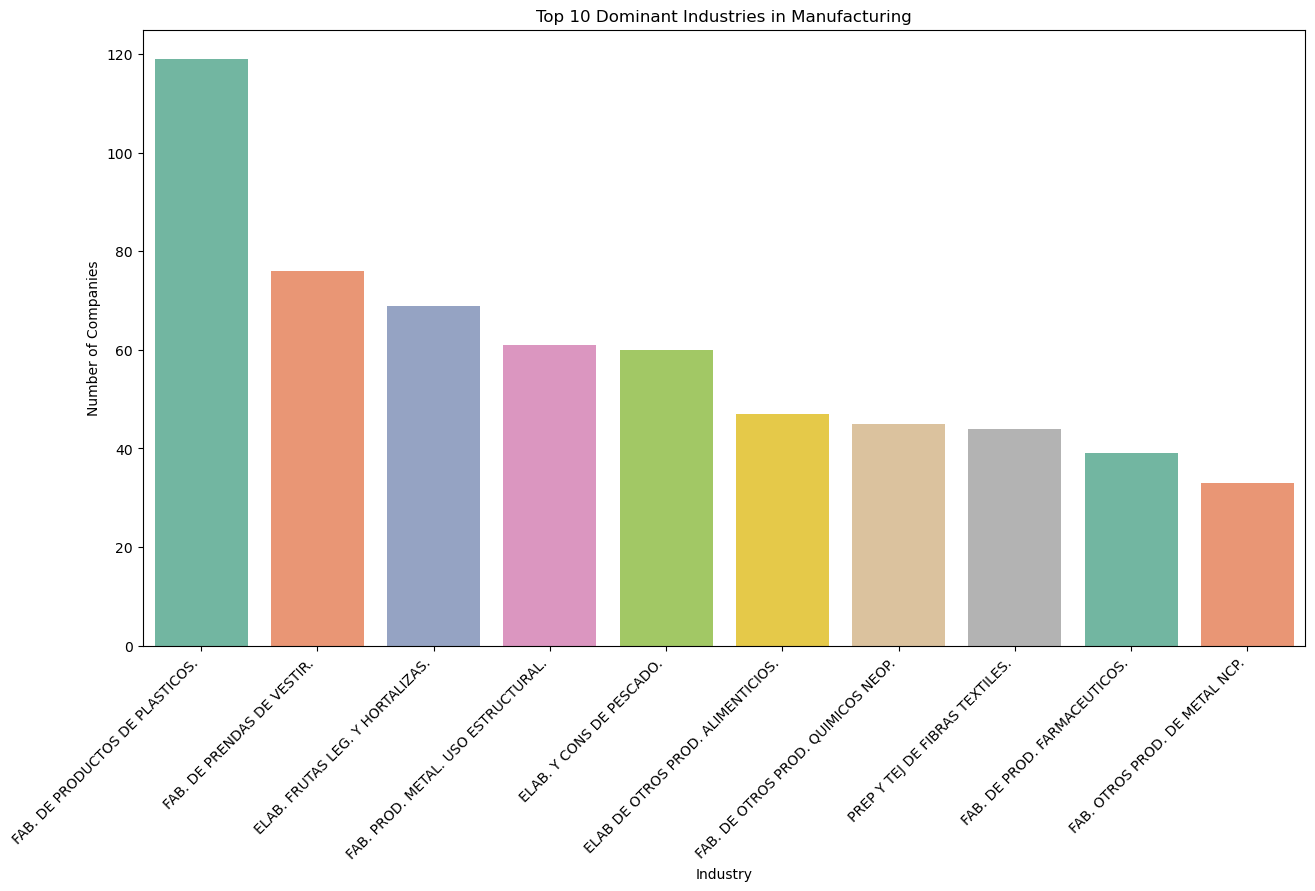

In [30]:
# 4. Identify the dominant industries within manufacturing and assess their resilience.
industry_counts = df['DESCRIPTION_CIIU'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Company_Count']

plt.figure(figsize=(15, 8))
sns.barplot(x='Industry', y='Company_Count', data=industry_counts.head(10), palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Dominant Industries in Manufacturing')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

Manufacture of plastic products - 119, 
Manufacture of Garment - 76, 
Processing and preserving of fruit and vegetables- 69, 
Manufacture Of Engines And Turbines, Except Aircraft, Vehicle And Cycle Engines - 61, 
Manufacture Of Luggage, Handbags And The Like, Saddlery And Harness - 60, 
Manufacture of other food products - 47, 
Manufacture of other chemical products - 45, 
Preparation and Weaving of textile fibres - 44, 
Manufacture of pharmaceuticals, medicinal chemicals and botanical products - 39, 
Manufacture of other fabricated metal product - 33, 

## Geographical Concentration:

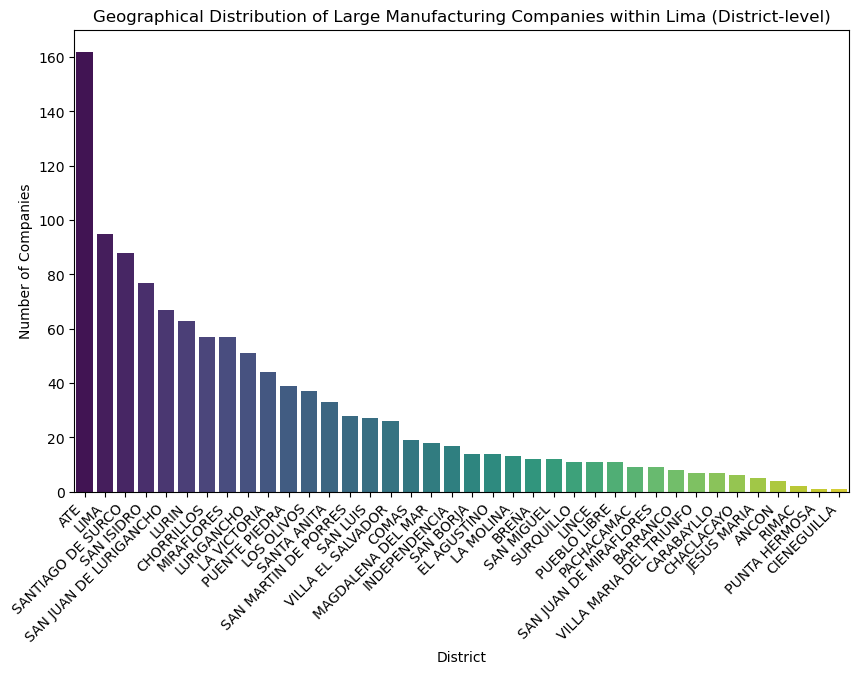

In [70]:
# 1. Explore the geographical distribution of large manufacturing companies within Lima (District-level analysis)
plt.figure(figsize=(10, 6))
sns.countplot(x='District', data=df, order=df['District'].value_counts().index, palette='viridis')
plt.title('Geographical Distribution of Large Manufacturing Companies within Lima (District-level)')
plt.xlabel('District')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
# 2. Identify areas with a concentration of manufacturing activities.
top_districts = df['District'].value_counts().head(5)
print("Top 5 Districts with the Highest Number of Manufacturing Companies:")
print(top_districts)

Top 5 Districts with the Highest Number of Manufacturing Companies:
ATE                       162
LIMA                       95
SANTIAGO DE SURCO          88
SAN ISIDRO                 77
SAN JUAN DE LURIGANCHO     67
Name: District, dtype: int64


## 3. Skill Requirements Analysis :

In [ ]:
# Which districts have the highest and lowest employment rates based on the number of manufacturing companies?

The district with the highest employment rate is "Ate".
The district with the lowest employment rate is "Cieneguilla".

### Evaluated the skill sets required for jobs in the Top 5 manufacturing sector.

1. **Manufacture of Plastic Products (ISIC Code: 2520):**
   - Plastic molding and extrusion
   - Quality control in plastic manufacturing
   - Polymer chemistry
   - Machine operation and maintenance for plastic production

2. **Manufacture of Garment (ISIC Code: 1810):**
   - Sewing and stitching
   - Pattern making and cutting
   - Textile knowledge
   - Quality control in garment production
   - Machine operation in garment manufacturing

3. **Processing and Preserving of Fruit and Vegetables (ISIC Code: 1513):**
   - Food processing techniques
   - Quality control in food processing
   - Knowledge of preservation methods
   - Equipment operation in food processing

4. **Manufacture of Engines and Turbines, Except Aircraft, Vehicle, and Cycle Engines (ISIC Code: 2811):**
   - Mechanical engineering
   - Precision machining
   - Engine assembly and testing
   - Quality assurance in engine manufacturing

5. **Manufacture of Luggage, Handbags and the Like, Saddlery, and Harness (ISIC Code: 1512):**
   - Leatherworking
   - Design and pattern making for bags and luggage
   - Sewing and stitching for leather goods
   - Quality control in leather product manufacturing

6. **Manufacture of Other Food Products (ISIC Code: 1549):**
   - Specialized food processing techniques
   - Culinary skills
   - Quality control in food production
   - Compliance with food safety regulations

7. **Manufacture of Other Chemical Products (ISIC Code: 2429):**
   - Chemical engineering
   - Chemical synthesis
   - Laboratory techniques
   - Quality control in chemical manufacturing

8. **Preparation and Weaving of Textile Fibres (ISIC Code: 1711):**
   - Textile preparation processes
   - Weaving and loom operation
   - Textile design and pattern making
   - Quality control in textile manufacturing

9. **Manufacture of Pharmaceuticals, Medicinal Chemicals, and Botanical Products (ISIC Code: 2423):**
   - Pharmaceutical manufacturing processes
   - Biochemistry
   - Laboratory and research skills
   - Compliance with pharmaceutical regulations

10. **Manufacture of Other Fabricated Metal Products (ISIC Code: 2899):**
    - Metal fabrication and welding
    - Precision machining
    - Quality control in metal product manufacturing
    - Blueprint reading and interpretation

These key skills represent a combination of technical expertise, operational knowledge, and quality control measures relevant to each specific industry within the manufacturing sector.

## 4. Recommendations and Actionable Insights:
**1. Strategic Resource Allocation:**

Leveraging the insights from the dataset, strategic resource allocation can be achieved by focusing on sectors or areas with high economic potential. The concentration of companies in specific CIIU codes and districts can guide resource allocation decisions. Prioritize investments and incentives in industries such as Manufacture of Plastic Products (CIIU: 2520), Garment Manufacturing (CIIU: 1810), and others with a significant presence.

**2. Collaboration Opportunities:**

Identifying collaboration opportunities is crucial for fostering innovation and growth within the manufacturing sector. Companies sharing similar CIIU codes or operating in the same districts could benefit from collaborative initiatives. Encourage partnerships for joint research and development, resource sharing, and market expansion to stimulate overall sectoral growth.

**3. Policy Formulation:**

To support Lima's manufacturing sector, policies must be formulated based on industry-specific insights. These targeted policies should address challenges and capitalize on opportunities, fostering an environment conducive to sustained growth. Recommendations for policy improvements should focus on creating a favorable business climate, incentivizing investment, and industry-specific support programs to foster a conducive business environment.


**4. Regional Economic Disparities:**

To address regional economic disparities, identify districts with high economic growth and those requiring additional development efforts. Propose policies or incentives, such as tax breaks or infrastructure development initiatives, to encourage manufacturing investment in underdeveloped districts. This can contribute to balanced regional development and job creation.

**5. Industry Diversification:**

Exploring opportunities for industry diversification is vital for long-term economic stability. Lima's manufacturing sector should consider entering emerging industries to capitalize on new markets and technologies. Evaluating the potential impact of diversification on economic stability allows for informed decision-making and the creation of policies that support a dynamic and resilient manufacturing landscape.

**6. Sustainability and Innovation:**

Assessing companies' sustainability practices is paramount for responsible economic development. Policymakers should encourage and incentivize sustainable practices within the manufacturing sector, promoting environmental and social responsibility. Identifying and promoting innovative approaches contributes to the sector's competitiveness and long-term viability. Proposed policies should prioritize sustainability, innovation, and responsible business practices.

## Conclusion:
- The distribution of companies across different manufacturing industries (CIIU codes) highlights the diversity of the manufacturing sector.
- Industries such as "Manufacture Of Weapons And Ammunition (CIIU: 2520)" and "Manufacture of Garment (CIIU: 1810)" have a significant presence in Lima.
- The geographical distribution of manufacturing companies across Lima's districts reveals concentrations in areas such as ATE, LIMA, and SANTIAGO DE SURCO.
- ATE stands out as the district with the highest number of manufacturing companies, indicating a potential industrial hub.
- Assessing the skill sets required for jobs in top manufacturing sectors provides insights into workforce needs.
- The recommendations provided address various aspects, emphasizing the importance of collaboration, strategic resource allocation, and policies tailored to the specific needs of the manufacturing landscape in Lima.


## Reference
 ISIC/CIIU Code with Categories
https://siccode.com/isic-code-hierarchy/c/manufacturing